# 1. Introduction

This course assumes some familiarity with Python, Jupyter notebooks and python scientific packages such as Numpy. There are many great resources to learn Python, including within Jupyter environements. For example [this](https://gitlab.erc.monash.edu.au/andrease/Python4Maths/tree/master/Intro-to-Python) is a great introduction that you can follow to refresh your memories if needed.

The course will mostly focus on image processing using the package scikit-image, which is 1) easy to install, 2) offers a huge choice of image processing functions and 3) has a simple syntax. Other tools that you may want to explore are [OpenCV](https://opencv.org/) (focus on computer vision) and [ITK](https://itkpythonpackage.readthedocs.io/en/latest/) (focus on medical image processing). Finally, it has recently become possible to "import" [Fiji (ImageJ)](https://github.com/imagej/pyimagej) into Jupyter, which may be of interest if you rely on specific plugins that are not implemented in Python (this is however in very beta mode).

## 1.1 Installation

### 1.1.1 Running the course material

To avoid loosing time at the beginning of the course with faulty installations, we provide for every attendee access to a remote computer on which to run notebooks (links will be provided in time). If you want to "full experience" you can install all the necessary packages on your own computer (see below). Note that all notebooks can also be opened and exectured within Colab, Google's own version of Jupyter notebooks. Getting the data needed for this lecture in Colab is a bit tricky so we discourage this option, but Colab is a great way to test notebook environements without any installation necessary.

### 1.1.2 Installing Python and Jupyter

Python and Jupyter can be installed on any operating system. Instead of manually installing all needed components, we highly recommend using the environment manager [conda](https://conda.io/docs/user-guide/index.html) by installing either [Anaconda or Miniconda](https://conda.io/docs/user-guide/install/index.html#) (follow instructions on the website). This will install Python, Python tools (e.g. pip), several important libraries (including e.g. Numpy) and finally the conda tool itself. For Mac/Linus users: Anaconda is quite big so we recommend installing Miniconda, and then installing additional packages that you need from the Terminal. For Windows users: Anaconda might be better for you as it installs a command prompt (Anaconda prompt) from which you can easily issue conda commands.

The point of using conda is that it lets you install various packages and even versions of Python within closed environments that don't interfere with each other. In such a way, once you have an environment that functions as intended, you don't have to fear messing it up when you need to install other tools for you next project.

Once conda is installed, you could create a conda environment for the course (e.g. using conda create -n course_env scikit-image jupyter jupyterlab pip). There are however many different parts to install and you can follow instructions in [Instructions_local.md](Env_setup/Instructions_local.md) to create the correct environment.

Note that if you need a new package for that environment, you can still install it using conda or pip. **Note that you need to install new packages within the terminal where the correct environment is activated. Otherwise, the package is installed system wide.** 

### 1.1.3 Using Google Colab

Google is offering for free its Colab tool. Colab notebooks are a customized version of Jupyter notebooks, with exactly the same underlying structure so that one can use them interchangably. Any notebook present in Google Drive can be opened with Colab, and exectuted on a remote computer. Most packages are preinstalled and can simply be imported. If something is missing, it can be installed using:

```
!pip install missing
```

directly within a notebook cell.

The pros: 1. absolutely no setup is needed. 2. You can just open any notebook and run it. 3. Additionally, you can run calculations on a GPU e.g. if you need to use deep learning methods.

The cons: 1. you need a Google account (you can just create one for this specific purpose). 2. While the notebook content is saved on Google Drive, specific installations are lost when the session is suspended or after 12 hours. 3. You need to upload all your data to Google Drive. 4. Using Colab might be challenging if you need some highly customized solution.

## 1.2 Some Python refresh

I give here a **very** short summary of basic Python, focusing on structures and operations that we will use during this lecture. So this is **not** an exhaustive Python introduction. There are many many operations that one can do on basic Python structures, however as we are mostly going to use Numpy arrays, those operations are **not** desribed here.

### 1.2.1 Variables and structures

There are multiple types of Python variables:

In [9]:
myint = 4
myfloat = 4.0
mystring ='Hello'
print(myint)
print(myfloat)
print(mystring)

4
4.0
Hello


The type of your variable can be found using type(): 

In [5]:
type(myint)

int

In [6]:
type(myfloat)

float

These variables can be assembled into various Python structures:

In [10]:
mylist = [7,5,9]
mydictionary = {'element1': 1, 'element2': 2}
print(mylist)
print(mydictionary)

[7, 5, 9]
{'element1': 1, 'element2': 2}


Elements of those structures can be accessed through **zero-based** indexing:

In [3]:
mylist[1]

5

In [4]:
mydictionary['element2']

2

One can append elements to a list:

In [5]:
mylist.append(1)
print(mylist)

[7, 5, 9, 1]


Measure its length:

In [6]:
len(mylist)

4

Ask if some value exists in a list:

In [7]:
5 in mylist

True

In [8]:
4 in mylist

False

### 1.2.2 Basic operations

A lot of operations are included by default in Python. You can do arithmetic:

In [23]:
a = 2
b = 3
#addition
print(a+b)
#multiplication
print(a*b)
#powers
print(a**2)

5
6
4


Logical operations returning booleans (True/False)

In [24]:
a>b

False

In [25]:
a<b

True

In [26]:
a<b and 2*a<b

False

In [27]:
a<b and 1.4*a<b

True

In [28]:
a<b or 2*a<b

True

Operations on strings:

In [31]:
mystring = 'This is my string'
mystring

'This is my string'

In [32]:
mystring+ ' and an additional string'

'This is my string and an additional string'

In [34]:
mystring.split()

['This', 'is', 'my', 'string']

### 1.2.2 Functions and methods

In Python one can get information or modify any object using either functions or methods. We have already seen a few examples above. For example when we asked for the length of a list we used the len() function:

In [9]:
len(mylist)

4

Python variables also have so-called methods, which are functions associated with particular object types. Those methods are written as variable.method(). For example we have seen above how to append an element to a list:

In [12]:
mylist.append(20)
print(mylist)

[7, 5, 9, 1, 'newelement', 'newelement', 20]


The two examples above involve only one argument, but any number can be used. All Python objects, inculding those created by other packages like Numpy function on the same scheme.

There are two ways to ask for help on funtions and methods. First, if you want to know how a specific function is supposed to work you can simply type:

In [17]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



This shows you that you can pass any container to the function len() (list, dictionary *etc.*) and it tells you what comes out. We will see later some more advanced examples of help information.

Second, if you want to know what methods are associated with a particular object you can just type:

In [18]:
dir(mylist)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

This returns a list of all possible methods. At the moment, only consider those **not** starting with an underscore. If you need help on one of those methods, you can type

In [22]:
help(mylist.append)

Help on built-in function append:

append(object, /) method of builtins.list instance
    Append object to the end of the list.



### 1.2.2 For, if

Loops and conditions are classical programming features. In python, one can write them in a very natural way. A for loop:

In [51]:
for i in [1,2,3,4]:
    print(i)

1
2
3
4


An if condition:

In [ ]:
a=5
if a>6:
    print('large')
else:
    print('small')

A mix of those:

In [53]:
for i in [1,2,3,4]:
    if i>3:
        print(i)

4


Note that **indentation of blocks is crucial in Python.**

### 1.2.3. Mixing lists, for's and if's

A very useful feature of Python is the very simple way it allows one to create lists. For exampel to create a list containing squares of certain values, in a classical programming languange one would do something like:

In [1]:
my_initial_list = [1,2,3,4]

my_list_to_create = []#initialize list

for i in my_initial_list:
    my_list_to_create.append(i*i)
print(my_list_to_create)
    

[1, 4, 9, 16]


Python allows one to do that in one line through a comprehension list, which is basically a compressed for loop:

In [2]:
[i*i for i in my_initial_list]

[1, 4, 9, 16]

In a lot of cases, the list that the for loop goes through is not an explicit list but another function, typically range() which generate either numbers from 0 to N (range(N)) or from M to N in steps of P (range(M,N,P)):

In [3]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
[i for i in range(0,10,2)]

[0, 2, 4, 6, 8]

If statements can be introduced in comprehension lists:

In [5]:
[i for i in range(0,10,2) if i>3]

[4, 6, 8]

In [6]:
[i if i>3 else 100 for i in range(0,10,2)]

[100, 100, 4, 6, 8]

A last very useful trick offered by Python is the function enumerate. Often when traversing a list, one needs both the actual value and the index of that value:

In [7]:
for ind, val in enumerate([8,4,9]):
    print('index: '+str(ind))
    print('value: ' + str(val))

index: 0
value: 8
index: 1
value: 4
index: 2
value: 9


### 1.2.4 Using packages

Python comes with a default set of data structures and operations. For particular applications like matrix calculations (image processing) or visulaization, we are going to need additional resources. Those exist in the form of python packages, ensembles of functions and data structures whose defintiions can be simply imported in any Python program.

For example to do matrix operations, we are going to use Numpy, so we run:

In [3]:
import numpy

Now we have access to all resources of numpy, allowing us to create structures e.g.:

In [5]:
numpy.zeros((4,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

which creates a four by four null matrix, or to do operations like a cosinus:

In [8]:
numpy.cos(1.5)

0.0707372016677029

To avoid lengthy typing, package names are usually abbreviated by giving them another name when loading them:

In [1]:
import numpy as np

Some additional tools are packaged as submodules within numpy. For example, generating random numbers can be done using the numpy.random submodule. An array of ten uniform random numbers can be for example generated using:

In [2]:
np.random.rand(10)

array([0.06800961, 0.80690571, 0.68062884, 0.87937931, 0.74166782,
       0.03274261, 0.92246323, 0.77294344, 0.44800348, 0.58981995])

To avoid lengthy typing, specific functions can be directly imported, which allows one to call them without specifying their source module:

In [3]:
from numpy.random import rand

rand(10)

array([0.49086397, 0.31651288, 0.94116076, 0.09041665, 0.54082966,
       0.11550137, 0.42536753, 0.93708947, 0.00597941, 0.98653834])

This should be used very cautiously, as it makes it more difficult to debgug code, once it is not clear anymore that a given function comes from a module.

## 1.3 Matplotlib

We are going to do most of our image plotting using the matplotlib library, and specifically the pyplot library. Let us import that module

In [4]:
import matplotlib.pyplot as plt

### 1.3.1 Plotting images
We need some image to plot, so for the moment let us just grab one that comes with skimage:

In [5]:
import skimage.data
image = skimage.data.coins()

The variable image is a Numpy array, and we'll see in the next chapter what that exactly is. For the moment just consider it as an image.

The piece of code that you are going to see the most often in this lectures is:

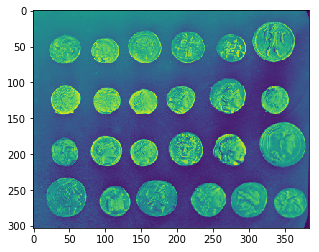

In [6]:
plt.imshow(image)
plt.show()

Here we simply called the function imshow() of the plt module which takes an image (array) as input and plots it. The show() function ensures that you can actually see the image and is always going to be the last command when you do any kind of plotting.

The rows and number indices are indicates on the left and the bottom and **actually** correspond to pixel indices. The image is just a gray-scale image, and Matplotlib used its default lookup table to color it (LUT in Fiji). We can change that by specifiy another LUT (you can find the list of LUTs [here](https://matplotlib.org/examples/color/colormaps_reference.html) by using the argument cmap (color map):

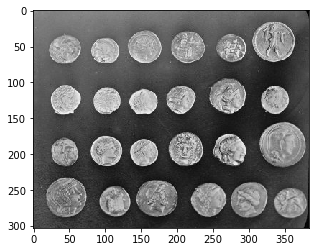

In [7]:
plt.imshow(image, cmap = 'gray')
plt.show()

Note that you can change the default color map used by matplotlib using a command of the type plt.yourcolor, *e.g.* for gray scale:

In [8]:
plt.gray()

<Figure size 432x288 with 0 Axes>

Sometimes we want to see a slightly larger image. To do that we have to add another line that specifies options for the figure.

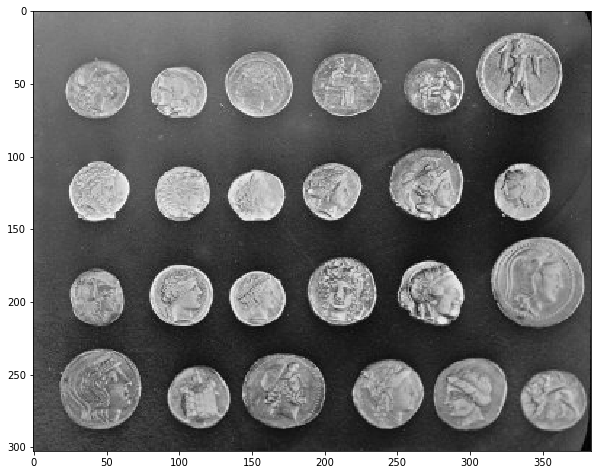

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(image, cmap = 'gray')
plt.show()

Sometimes we want to show an array of figures to compare for example an original image and its segmentations. We use the subplot() function and pass three arguments: number of rows, number of columns and index of plot. We use it for each element and increment the plot index: 

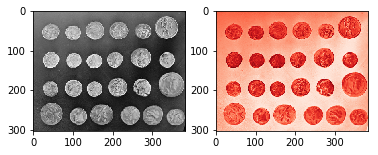

In [10]:
plt.subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(image, cmap = 'Reds')
plt.show()

The imshow() function takes basically two types of data. Either single planes as above, or images with three planes. In the latter case, imshow() assumes that the image is in RGB format (Red, Green, Blue) and uses those colors.

Finally, one can superpose various plot elements on top of each other. One very useful option in the frame of this course, is the possibility to ovelay an image in transparency on top of another using the alpha argument:

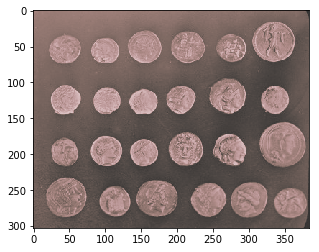

In [11]:
plt.imshow(image, cmap = 'gray')
plt.imshow(image, cmap = 'Reds', alpha = 0.2)
plt.show()

### 1.3.2 Plotting histograms

One thing that we are going to do very often is looking at histograms, typically of pixel values, for example to determine a threshold from background to signal. For that we can use the plt.hist() command.

**If we want to do a histogram of pixel values, we have to pass a one-dimensional array to the hist() function. If we pass the image directly, hist() believes we have several series of separate data. So we use the np.ravel() function, to transform our 2D image into 1D.**

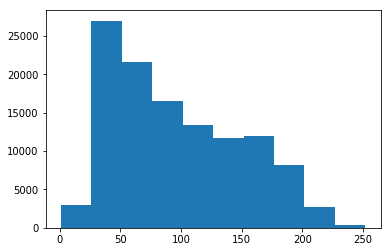

In [13]:
plt.hist(np.ravel(image))
plt.show()

Once we have an idea of the distribution of values, we can refine the binning:

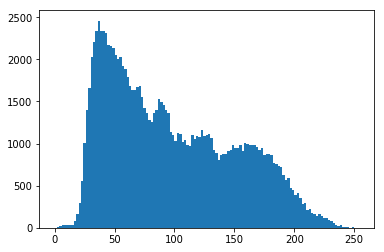

In [15]:
plt.hist(np.ravel(image), bins = np.arange(0,255,2))
plt.show()